# Observation and predictions of chicken weight on different diets

* observe the dataset  
* predict chick's weight using some Regressor 

# Observation of chicks dataset 🐣


## 1. Import modules

In [1]:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt    # plotting data
import seaborn as sns 
sns.set(color_codes=True)

## 2. Check the dataset

> The body weights of chicks were measured at birth and every second day thereafter until day 20. They were also measured on day 21. There were four groups of chicks on different protein diets.

In [2]:
chicks = pd.read_csv('/kaggle/input/weight-vs-age-of-chicks-on-different-diets/ChickWeight.csv')
chicks = chicks.drop([chicks.columns[0]], axis='columns')
chicks.sample(10)

,weight,Time,Chick,Diet
483,281,21,42,4
179,57,8,16,1
541,205,21,47,4
43,108,14,4,1
337,151,18,30,2
108,44,2,10,1
121,63,4,11,1
464,103,8,41,4
489,157,10,43,4
534,100,8,47,4


In [3]:
chicks.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


> The dataframe has exactly 578 rows and 4 int columns from an experiment on the effect of diet on early growth of chicks.

## 3. Create count plot with number of chicks on different diets  
**Diet 1** had more 'participants' than diets 2, 3 or 4 (more than 100 chicks!).

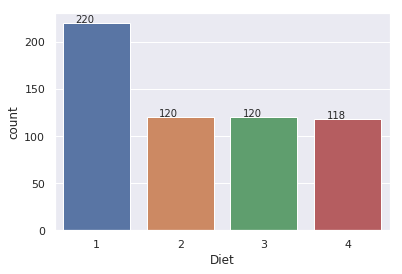

In [4]:
ax = sns.countplot(x="Diet", data=chicks)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

## 4. Create a scatter plot corresponding Time (days) and Weight (gm) of chicks  
* Colored markers show diet type.  
* 21 days of experiment, 12 days of measures

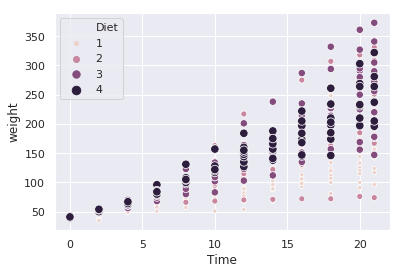

In [5]:
sns.scatterplot(x='Time',y='weight', hue="Diet", size='Diet', data=chicks)

🐔 If the dataframe is correct we should have 12 weights for every chicken.

# Pivoting chicks dataset

## 5. Pivoting data  
Pivot the data from long to wide, where columns `Chick` and `Diet` are the indexes and the column `Time` indicates different observations (weights) for each index. The observations were taken every other day - 0, 2, 4, ..., 18, 20, and last 21 day, so we have **12 days of measures**.

In [6]:
chicks_pivot = chicks.pivot_table(values="weight", index=['Chick', 'Diet'], columns='Time')
chicks_pivot.head(10)

,Time,0,2,4,6,8,10,12,14,16,18,20,21
Chick,Diet,,,,,,,,,,,,
1,1,42.0,51.0,59.0,64.0,76.0,93.0,106.0,125.0,149.0,171.0,199.0,205.0
2,1,40.0,49.0,58.0,72.0,84.0,103.0,122.0,138.0,162.0,187.0,209.0,215.0
3,1,43.0,39.0,55.0,67.0,84.0,99.0,115.0,138.0,163.0,187.0,198.0,202.0
4,1,42.0,49.0,56.0,67.0,74.0,87.0,102.0,108.0,136.0,154.0,160.0,157.0
5,1,41.0,42.0,48.0,60.0,79.0,106.0,141.0,164.0,197.0,199.0,220.0,223.0
6,1,41.0,49.0,59.0,74.0,97.0,124.0,141.0,148.0,155.0,160.0,160.0,157.0
7,1,41.0,49.0,57.0,71.0,89.0,112.0,146.0,174.0,218.0,250.0,288.0,305.0
8,1,42.0,50.0,61.0,71.0,84.0,93.0,110.0,116.0,126.0,134.0,125.0,NaN
9,1,42.0,51.0,59.0,68.0,85.0,96.0,90.0,92.0,93.0,100.0,100.0,98.0


There are 50 chicks but not all of them have complete observations in a period (f.e., NaN for chick 8 - day 21).

## 6. Check and drop None  
There are 5 chickens for those mesurements were made not every specified day:

In [7]:
chicks_pivot.isnull().any(axis=1).sum()

5

Drop poor chicks with not full observation list:

In [8]:
chicks_pivot = chicks_pivot.dropna();

# Unpivoting chicks dataset  
## 7. Create four scatter plots to show weight of different chicks by diet
* x - time, y - weight

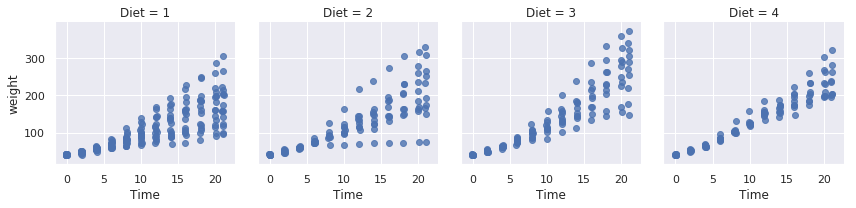

In [9]:
chicks = chicks_pivot.stack().reset_index(name='weight')
g = sns.FacetGrid(chicks, col="Diet", margin_titles=True)
g.map(sns.regplot, "Time", "weight",fit_reg=False, x_jitter=.1)

Diet 4 has the least variation.  
Diet 3 probabaly has the highest mean effect.

## 8. Create four box plots showing weight of different chicks by diet
* x - diet, y - weight

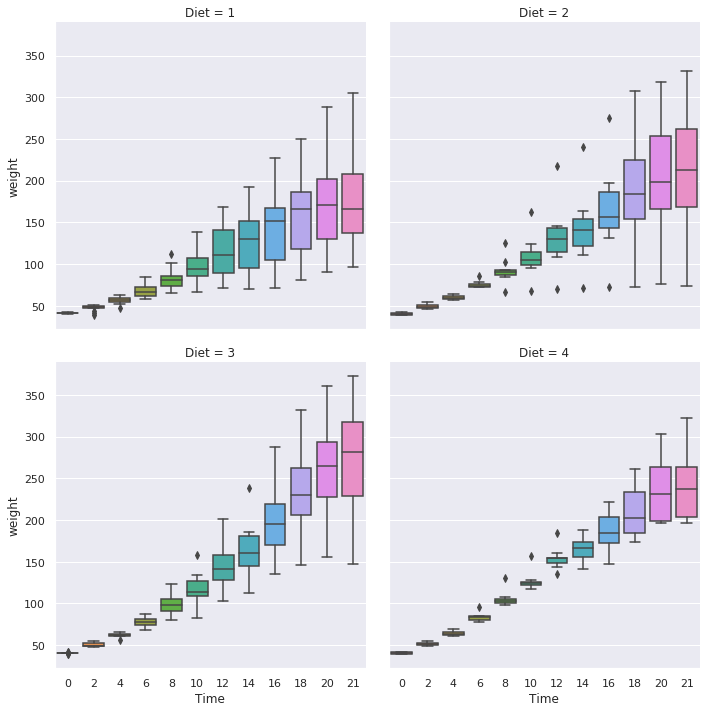

In [10]:
sns.catplot(x="Time", y="weight", col="Diet", data=chicks, kind="box", col_wrap=2)

Diet 3 has the highest mean weight gain but also it has more variation than Diet 4.

## 9. Get statistics by Diets
Maximum weight was achieved on Diet 3.

In [11]:
chicks.groupby('Diet').agg(
    max_weight=('weight', max),
    min_weight=('weight', min),
    avg_weight=('weight', 'mean'),
    total_weight=('weight', sum),
    num_chicks=('Chick', 'count')    
)

,max_weight,min_weight,avg_weight,total_weight,num_chicks
Diet,,,,,
1,305.0,39.0,107.640625,20667.0,192
2,331.0,39.0,122.616667,14714.0,120
3,373.0,39.0,142.950000,17154.0,120
4,322.0,39.0,138.333333,14940.0,108


# Find the best model to predict chicks weight

We need to use some regression algorithm because we are aimed to predict a continuous number (weight).

## 1. Prepare the data  
* Create list of predictions variable: **y - weight**  
* Create list of features: **X - ['Diet', 'Time']**  
* Create train data (80%) and test data (validation, 20%) for both lists using `train_test_split` function from `sklearn` which shiffles the dataset using the pseudorandom number generator. Parameter `random_state = 1` is a fixed seed to make the output determenistic.

In [12]:
from sklearn.model_selection import train_test_split

# y = WEIGHT -> target
y = chicks.weight
# Create X = ["Diet", "Time"] -> data
features = ["Diet", "Time"]
X = chicks[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.2)

## 2. Apply linear models  
### **2.1** Specify a model and fit it with parameters
* **LinearRegression** - a linear approach to modeling the relationship between a dependent variable and one or more independent variables. Here we have a SIMPLE linear regression because there is only one independent (exploratory) variable - `Weight`.  
* **Ridge** - or Tikhonov regularization - a linear approach which is useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters (**L2**).  
* **Lasso** - least absolute shrinkage and selection operator - was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding (**L1**).  
* **ElasticNet** - Linear regression with combined L1 and L2 priors as regularizer.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

# Specify Model and fit it
C_modelRegr =  LinearRegression().fit(train_X, train_y)
C_modelRidge = Ridge().fit(train_X, train_y)
C_modelLasso = Lasso().fit(train_X, train_y)
C_modelElasticNet = ElasticNet(alpha = 0.1).fit(train_X, train_y)

**2.2** Evaluating the model 

* Calculate mean absolute error (MAE) and scores on the training and test data. The MAE list is the absolute values of each error (positive numbers), so MAE is the average of those absolute errors. 
* Find best score for training and test data using `model.score()` function

In [14]:
print("Linear Regression:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelRegr.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelRegr.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelRegr.score(val_X, val_y)))

print("Ridge Regression:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelRidge.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelRidge.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelRidge.score(val_X, val_y)))

print("Lasso Regression:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelLasso.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelLasso.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelLasso.score(val_X, val_y)))

print("Elastic Net:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelElasticNet.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelElasticNet.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelElasticNet.score(val_X, val_y)))

Linear Regression:
	Validation MAE: 20
	Accuracy on train data: 0.739
	Accuracy on test data: 0.729
Ridge Regression:
	Validation MAE: 20
	Accuracy on train data: 0.739
	Accuracy on test data: 0.729
Lasso Regression:
	Validation MAE: 20
	Accuracy on train data: 0.739
	Accuracy on test data: 0.727
Elastic Net:
	Validation MAE: 20
	Accuracy on train data: 0.739
	Accuracy on test data: 0.728


Scores on the training and test data are very close together that means it is likely underfitting than overfitting (anyway, we have only two features).  
Classical linear regression model as well as Ridge Regression model show best score on test data (72.9%). It means that regression model `C_modelRegr` predicted the weight correctly for 72.9% of the samples in the test data.

## 3. Apply KNN Regressor  
k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.
* **KNeighborsRegressor** - regression based on k-nearest neighbors algorithm (k-NN). The output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [15]:
from sklearn.neighbors import KNeighborsRegressor
C_modelKNN =  KNeighborsRegressor(n_neighbors = 25).fit(train_X, train_y)

In [16]:
print("KNeighbors Regressor:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelKNN.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelKNN.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelKNN.score(val_X, val_y)))

KNeighbors Regressor:
	Validation MAE: 17
	Accuracy on train data: 0.770
	Accuracy on test data: 0.778


KNeighbors Regressor model shows better score on test data (77.8%) than any linear model. 

## 4. Using tree, ensemble and neural network  

* **DecisionTreeRegressor** - a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
* **RandomForestRegressor** - or random decision forests - an ensemble learning method that operates by constructing a multitude of decision trees at training time and for regression outputting the mean prediction of the individual trees.
* **MLPRegressor** - Multi-layer Perceptron regressor - model which optimizes the squared-loss using LBFGS (Limited-memory BFGS) or sgd (stochastic gradient descent).

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Specify Model and fit it
C_modelDTreeRegr = DecisionTreeRegressor(max_leaf_nodes = 25, random_state=1).fit(train_X, train_y)
C_modelForest = RandomForestRegressor(n_estimators=70, max_depth=3, random_state=1).fit(train_X, train_y)
C_modelMLPRegr = MLPRegressor(solver = 'lbfgs', random_state = 1, hidden_layer_sizes =[10]).fit(train_X, train_y)

In [18]:
print("Decision Tree Regressor:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelDTreeRegr.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelDTreeRegr.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelDTreeRegr.score(val_X, val_y)))

print("Random Forest Regressor:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelForest.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelForest.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelForest.score(val_X, val_y)))

print("MLP Regressor:")
print("\tValidation MAE: {:,.0f}".format(mean_absolute_error(C_modelMLPRegr.predict(val_X), val_y)))
print("\tAccuracy on train data: {:.3f}".format(C_modelMLPRegr.score(train_X, train_y)))
print("\tAccuracy on test data: {:.3f}".format(C_modelMLPRegr.score(val_X, val_y)))

Decision Tree Regressor:
	Validation MAE: 18
	Accuracy on train data: 0.780
	Accuracy on test data: 0.753
Random Forest Regressor:
	Validation MAE: 18
	Accuracy on train data: 0.765
	Accuracy on test data: 0.775
MLP Regressor:
	Validation MAE: 18
	Accuracy on train data: 0.758
	Accuracy on test data: 0.761


## 5. Conclusion
Random Forest Regressor model shows best score on test data which is **77.5%** and is better than any regression model or a single decision tree. Anyway, MAE of Random Forest Regressor model is 18 and is bigger than KNeighbors Regressor (17).